In [15]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from pandas_datareader.data import DataReader
from datetime import datetime

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end =datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [16]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [18]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,254.555437,248.832659,251.306388,251.932698,3.349314e+07,250.445609
std,43.730422,42.514766,42.950183,43.371455,1.722106e+07,43.821127
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,211.697502,207.304996,209.294994,208.999996,2.184540e+07,207.269333
50%,258.020004,248.580002,250.824997,254.549995,2.834300e+07,253.683472
75%,290.190010,283.162514,284.885002,288.317490,3.841992e+07,287.539139
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [19]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-24 to 2020-05-22
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


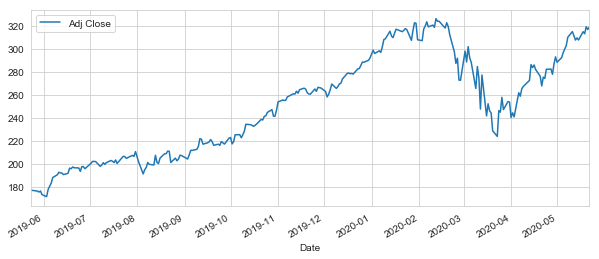

In [20]:
AAPL['Adj Close'].plot(legend =True, figsize =(10,4))

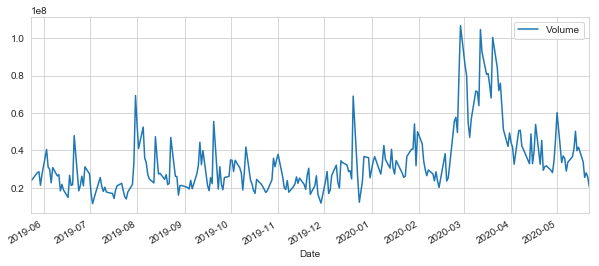

In [21]:
AAPL['Volume'].plot(legend =True, figsize =(10,4))

In [25]:
ma_day =[10,20,50]
for ma in ma_day:
    column_name = "MA in {} no of days".format(ma)
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

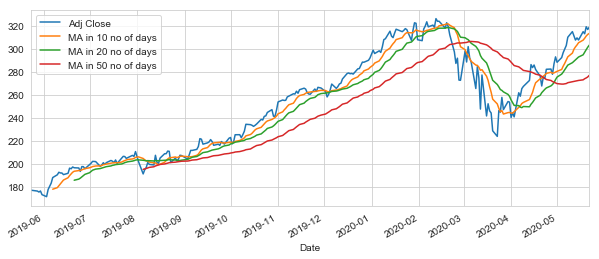

In [30]:
AAPL[['Adj Close','MA in 10 no of days','MA in 20 no of days','MA in 50 no of days']].plot(subplots=False, figsize =(10,4))

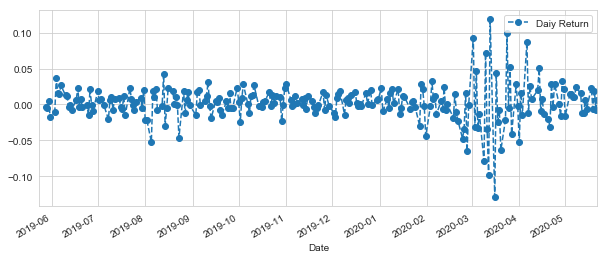

In [33]:
AAPL['Daiy Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daiy Return'].plot(figsize =(10,4), legend =True, linestyle ='--',marker ='o')

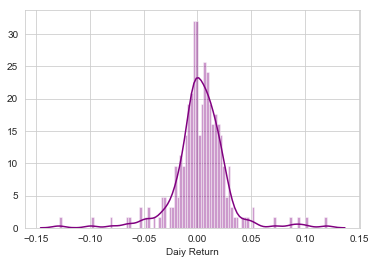

In [35]:
sns.distplot(AAPL['Daiy Return'].dropna(),bins=100, color ='purple' )

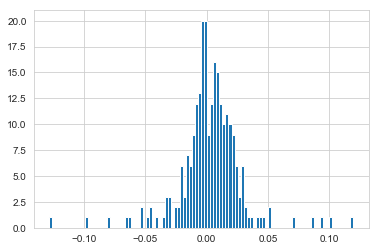

In [36]:
AAPL['Daiy Return'].hist(bins=100)

In [37]:
closing_df =DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [38]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-24,176.859283,1823.280029,1133.469971,124.705452
2019-05-28,176.128006,1836.430054,1134.150024,124.626442
2019-05-29,175.288025,1819.189941,1116.459961,123.421265
2019-05-30,176.197189,1816.319946,1117.949951,124.201653
2019-05-31,173.005280,1775.069946,1103.630005,122.176575


In [39]:
tech_rets =closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-24,NaN,NaN,NaN,NaN
2019-05-28,-0.004135,0.007212,0.000600,-0.000634
2019-05-29,-0.004769,-0.009388,-0.015598,-0.009670
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305


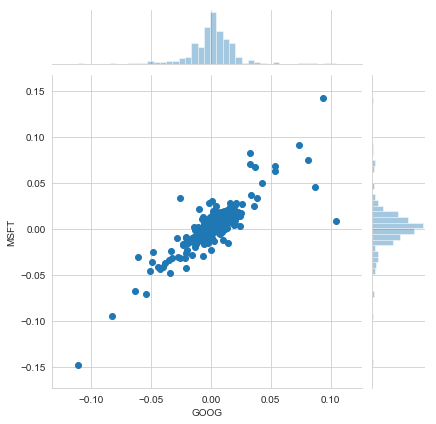

In [40]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

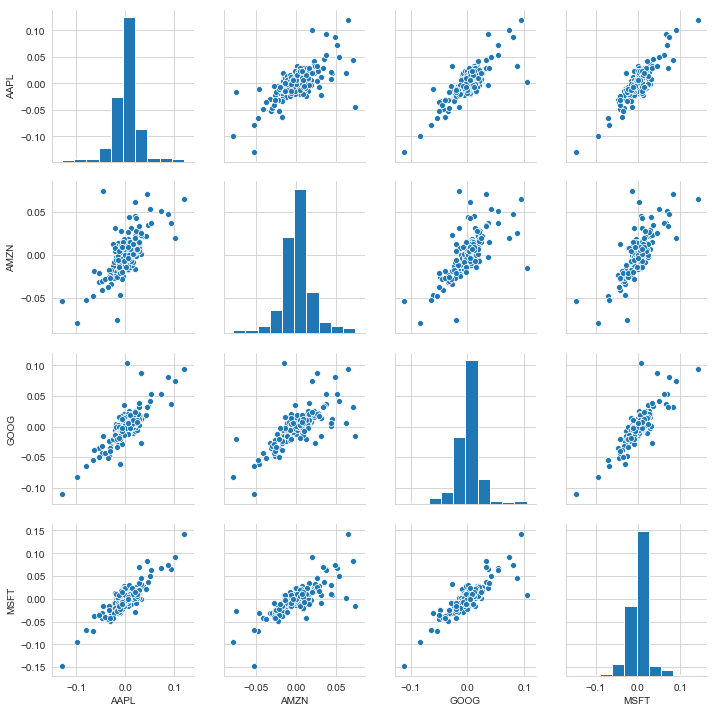

In [43]:
sns.pairplot(tech_rets.dropna())

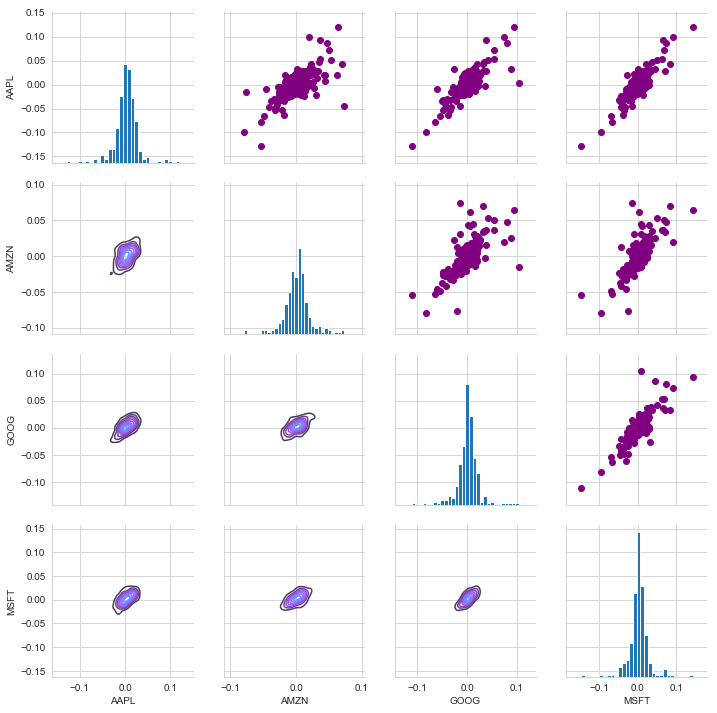

In [47]:
return_rts = sns.PairGrid(tech_rets.dropna())
return_rts.map_upper(plt.scatter,color ='purple')
return_rts.map_lower(sns.kdeplot,cmap ='cool_d')
return_rts.map_diag(plt.hist,bins=30)

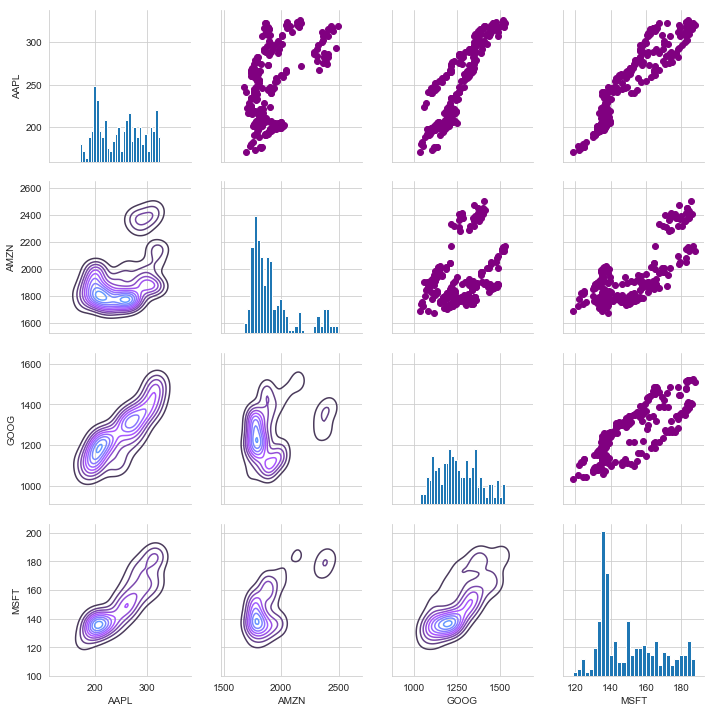

In [48]:
return_rts = sns.PairGrid(closing_df.dropna())
return_rts.map_upper(plt.scatter,color ='purple')
return_rts.map_lower(sns.kdeplot,cmap ='cool_d')
return_rts.map_diag(plt.hist,bins=30)

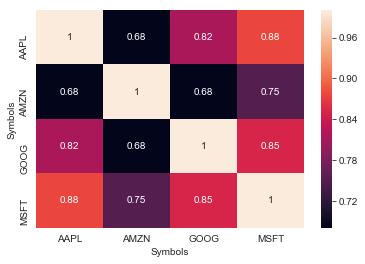

In [55]:
df = tech_rets.corr()
sns.heatmap(df,annot=True)

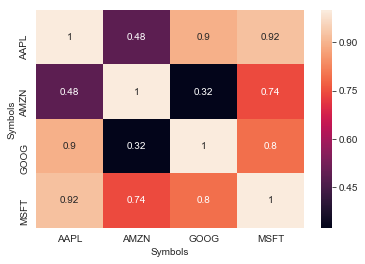

In [56]:
df = closing_df.corr()
sns.heatmap(df,annot=True)

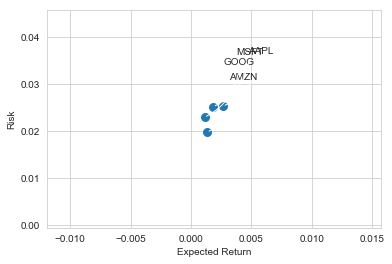

In [58]:
#Risk Analysis

rets =tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(),rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\jayakumt\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jayakumt\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\jayakumt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jayakumt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


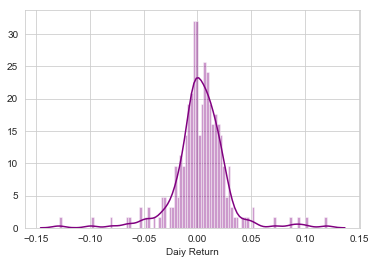

In [62]:
sns.distplot(AAPL['Daiy Return'], bins=100, color ='purple')

In [63]:
rets['AAPL'].quantile(0.05)

-0.03315459757901379

In [64]:
days = 365
dt =1/days

mu =rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [68]:
def monte_carlo(start_price,days, mu,sigma):
    price = np.zeros(days)
    price[0]= start_price
    shock =np.zeros(days)
    drift =np.zeros(days)
    
    for x in range(1,days):
        shock[x]= np.random.normal(loc = mu* dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu *dt
        price[x] = price[x-1] + (price[x-1] * ( drift[x] +shock[x] ))
        
    return price

In [69]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005


Text(0.5, 1.0, 'Monte Carlo Analysis For Google')

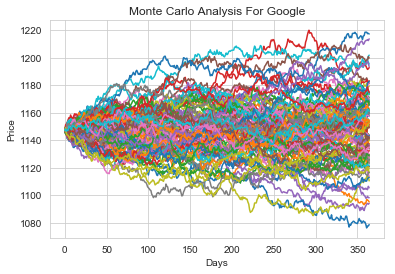

In [70]:
start_price =1147

for x in range(100):
    plt.plot(monte_carlo(start_price,days, mu,sigma))


plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For Google')

In [73]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):    
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1];

In [78]:
q = np.percentile(simulations, 1)

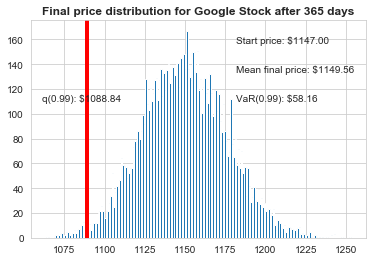

In [80]:
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, "Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold');